In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_groq import ChatGroq

model = ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))

In [3]:
from langchain_core.prompts import PromptTemplate

In [5]:
#help(PromptTemplate)

In [6]:
#PromptTemplate.from_template('prompt-string/text')

PromptTemplate.from_template('I likes to read java book')

PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='I likes to read java book')

In [ ]:
# To Create dynamic value -> template placeholder/variable {variable/placeholder}
# PromptTemplate.from_template('prompt-string/text') ->object
# object.format(userdefined_input_placeholder=Value)

In [7]:
obj = PromptTemplate.from_template('I likes to read {mybook} book')
obj.format(mybook="python")

'I likes to read python book'

In [8]:
obj

PromptTemplate(input_variables=['mybook'], input_types={}, partial_variables={}, template='I likes to read {mybook} book')

In [9]:
obj.format(mybook="story")

'I likes to read story book'

In [10]:
obj = PromptTemplate.from_template('I likes to read {mybook} book written by {author} released on {year}')
obj.format(mybook="birds",author='Mr.ABC',year=2004)

'I likes to read birds book written by Mr.ABC released on 2004'

In [ ]:
ChatPromptTemplate
 |-> System Message 
         - sets behavior / rules for the LLM 
         - Priority instruction (ex: helpful assistant)
                     |-> tone(strict,friendly,expert)

 |-> Human Message 
          - user input - userQuery/question


context - CONTEXT - Retrieved documents  --> {context} <-- pre-defined placeholder
                                                +
                                                llm ->response 
    

1. Role/context 
2. Task 
3. Format - (ex: provide the answer as a bullet point 
                 write it in json format
                 keep it under 100 words...)
4. Constraints -  don't use technical jargon
                  use python 3.10 features only
5. example - optional

In [13]:
#from langchain.prompts import ChatPromtTemplate
from langchain_core.prompts import ChatPromptTemplate

In [15]:
#help(ChatPromptTemplate)
ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant'),
        ('human','I likes to read {mybook} books')
    ]
)

ChatPromptTemplate(input_variables=['mybook'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='you are helpful assistant'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['mybook'], input_types={}, partial_variables={}, template='I likes to read {mybook} books'), additional_kwargs={})])

In [16]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant'),
        ('human','I likes to read {mybook} books')
    ]
)
prompt.format_messages(mybook="ruby")

[SystemMessage(content='you are helpful assistant', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I likes to read ruby books', additional_kwargs={}, response_metadata={})]

In [17]:
prompt.format_messages(mybook="ansible")

[SystemMessage(content='you are helpful assistant', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I likes to read ansible books', additional_kwargs={}, response_metadata={})]

In [18]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant'),
        ('human','Question:{question}')
    ]
)

In [ ]:
chain_obj = prompt_object|llm_object   Langchain Expression - (LCE)
              (1)            (2)   

chain_obj.invoke({'question':'User Query'}) 

In [19]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [21]:
from langchain_groq import ChatGroq

llm_obj = ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))

In [22]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant'),
        ('human','Question:{question}')
    ]
)

In [23]:
my_chain = prompt|llm_obj

In [27]:
response = my_chain.invoke({'question':'What is Langchain?'})
print(response.content)

LangChain is an open-source, Python-based framework for building large language models (LLMs) and multimodal models. It was created by Joshua Browder, the founder of DoNotPay, to make it easier to work with AI models in various applications.

The LangChain framework provides a set of APIs and tools that enable developers to:

1. **Interact with LLMs**: LangChain allows developers to interact with LLMs, such as generating text, answering questions, or completing tasks.
2. **Build custom models**: LangChain provides a set of building blocks for creating custom models, including multimodal models that can handle text, images, and other media types.
3. **Integrate with other tools**: LangChain supports integration with other AI tools, such as natural language processing (NLP) libraries and data storage systems.

Some key features of LangChain include:

* **Model-agnostic**: LangChain supports a wide range of LLMs, including popular ones like LLaMA, BERT, and RoBERTa.
* **Multimodal**: Lang

In [28]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant answer in 2 bullet points'),
        ('human','Question:{question}')
    ]
)

In [30]:
my_chain = prompt|llm_obj
response = my_chain.invoke({'question':'What is Langchain?'})
print(response.content)

Here are 2 bullet points to explain Langchain:

* **Definition:** Langchain is an open-source, AI-powered platform that enables the creation of conversational AI models and applications. It is designed to facilitate the development of more sophisticated and human-like AI assistants.
* **Key Features:** Langchain offers a range of features, including the ability to build custom AI models, generate text and code, and integrate with other services and tools. It uses a modular architecture to enable developers to create complex AI systems that can understand and respond to natural language inputs.


In [31]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system',"Say don't Know"),
        ('human','Question:{question}')
    ]
)
my_chain = prompt|llm_obj
response = my_chain.invoke({'question':'What is Langchain?'})
print(response.content)

I don't know


In [32]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant answer in 2 bullet points'),
        ('human','Question:{question}')
    ]
)
my_chain = prompt|llm_obj
response = my_chain.invoke({'question':'What is Langchain?'})
print(response.content)

Here are 2 bullet points about Langchain:

* Langchain is an open-source artificial intelligence (AI) platform that enables users to build and deploy large language models (LLMs) at scale. It allows developers to create, train, and fine-tune LLMs using a variety of programming languages and frameworks.
* Langchain provides a suite of tools and APIs for building and integrating LLMs into various applications, such as chatbots, virtual assistants, and other conversational interfaces. Its goal is to make it easier for developers to create and deploy AI models that can understand and generate human-like language.


In [ ]:
## General Text - prompt 

In [39]:
## Text summarization
text = '''
Aritfical Intelligence(AI) is transforming industries..
AI models are used in hearthcare,finance,education,enterprise indus and also support autonomous system'''

my_prompt = f'summarize the following text in 3 bullet points:\n {text}'

In [44]:
print(my_prompt)

summarize the following text in 3 bullet points:
 
Aritfical Intelligence(AI) is transforming industries..
AI models are used in hearthcare,finance,education,enterprise indus and also support autonomous system


In [45]:
from langchain_community.llms import Ollama
my_llm_obj = Ollama(model="gemma2:2b")

C:\Users\karth\AppData\Local\Temp\ipykernel_29004\275367955.py:2: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the `langchain-ollama package and should be used instead. To use it run `pip install -U `langchain-ollama` and import as `from `langchain_ollama import OllamaLLM``.
  my_llm_obj = Ollama(model="gemma2:2b")


In [47]:
print(my_llm_obj.invoke(my_prompt))

Here's a summary of the provided text in three bullet points:

* **Artificial intelligence (AI) is rapidly reshaping various sectors.** AI models are being implemented across fields like healthcare, finance, education, business, and even supporting autonomous systems. 
* **Applications of AI models offer substantial benefits.**  They provide automation, improved efficiency, and predictive capabilities to enhance these industries.
* **AI's impact extends beyond just specific fields.** It is enabling advancements in autonomous technology across diverse areas, including healthcare and transportation. 


Let me know if you would like further details about any of these aspects! 



In [48]:
## Text summarization
text = '''
Aritfical Intelligence(AI) is transforming industries..
AI models are used in hearthcare,finance,education,enterprise indus and also support autonomous system'''

my_prompt = f'summarize the following text in 2 bullet points:\n {text}'

In [49]:
print(my_llm_obj.invoke(my_prompt))

Here's a two-bullet summary of the text:

* **Artificial intelligence (AI) is having a major impact across various sectors.** It's being utilized in healthcare, finance, education, business, and even in developing autonomous systems. 
* **AI models are powering innovation in these areas,** enabling advancements like automated decision-making, personalized learning experiences, and improved efficiency in various industries.  



In [50]:
## Grammar and Text Correction

prompt = '''
Correct grammar and spelling mistakes in this text:
"AI are chaining the world in many way. It help peoples to work faster"
'''

response = llm_obj.invoke(prompt)

print(response)

content='The corrected text is:\n\n"AI is changing the world in many ways. It helps people to work faster."\n\nHere\'s a breakdown of the corrections:\n\n- "AI are" should be "AI is" because AI refers to a single entity, a machine learning model, and uses a singular verb.\n- "chaining" should be "changing" because "chaining" refers to linking things together, whereas "changing" refers to the process of altering or modifying something.\n- "the world in many way" should be "the world in many ways" because "ways" is a plural noun and agrees with "many".\n- "It help" should be "It helps" because the verb "helps" is the correct form of the verb "to help" in the present tense.\n- "peoples" should be "people" because "people" is the correct plural form of the noun "person".' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 186, 'prompt_tokens': 61, 'total_tokens': 247, 'completion_time': 0.308915702, 'prompt_time': 0.004883294, 'queue_time': 0.052014996, 'total_tim

In [51]:
print(response.content)

The corrected text is:

"AI is changing the world in many ways. It helps people to work faster."

Here's a breakdown of the corrections:

- "AI are" should be "AI is" because AI refers to a single entity, a machine learning model, and uses a singular verb.
- "chaining" should be "changing" because "chaining" refers to linking things together, whereas "changing" refers to the process of altering or modifying something.
- "the world in many way" should be "the world in many ways" because "ways" is a plural noun and agrees with "many".
- "It help" should be "It helps" because the verb "helps" is the correct form of the verb "to help" in the present tense.
- "peoples" should be "people" because "people" is the correct plural form of the noun "person".


In [ ]:
## Tasks - prompting

1. open any text file /log file - regular file - use python file handling --> open a inputFile ->read a content ->pass this input to prompt
2. define prompt - Summarize 5 bullet points

## Text to structred results (ex: json format)
Ex: text = "Ctpl indus was founded by Mr.Ram in the year 1982 in Bangalore"
name,year,industry,place 

## Text -->Rewrite 
Ex: text = "Our product is afforable and useful for every customers" 


In [55]:
s = open('C:\\Users\\karth\\my_docs.txt').read()

prompt = f'Summarize the following text in 5 bullet points:\n\n{s}'

response = llm_obj.invoke(prompt)
print(response.content)

Here are 5 bullet points summarizing the text:

• LangChain is an open-source framework for building applications powered by large language models (LLMs).
• LangChain simplifies the application lifecycle, covering development, productionization, and deployment stages.
• During development, LangChain provides building blocks and integrations for creating LLM applications, including stateful agents with streaming and human-in-the-loop support.
• LangChain includes tools like LangSmith for inspecting, monitoring, and evaluating applications to ensure continuous optimization and deployment.
• LangChain's deployment stage involves turning developed applications into production-ready APIs and Assistants through the LangGraph Platform.


In [57]:
## Text to structred results (ex: json format)
#Ex: text = "Ctpl indus was founded by Mr.Ram in the year 1982 in Bangalore"
#name,year,industry,place 

text = "Ctpl indus was founded by Mr.Ram in the year 1982 in Bangalore"

prompt = f"From the given text:{text} extract information such as name,year,indus,place in json"

response = llm_obj.invoke(prompt)
print(response.content)

Based on the given text, here's the extracted information in JSON format:

```json
{
  "Name": "Mr. Ram",
  "Year": 1982,
  "Organization": "CTpl Indus",
  "Location": "Bangalore"
}
```

However, since 'indus' was mentioned in the context of the organization name 'CTpl Indus', it's already included in the 'Organization' field. If you'd like to separate it, here's an alternative:

```json
{
  "Name": "Mr. Ram",
  "Year": 1982,
  "Main Organization": "CTpl",
  "Sub Organization": "Indus",
  "Location": "Bangalore"
}
```


In [58]:
## Text -->Rewrite 
# Ex: text = "Our product is afforable and useful for every customers" 

text = "Our product is afforable and useful for every customers" 

prompt = f"Rewrite the given text:{text} in formal and profession:"

print(llm_obj.invoke(prompt).content)


Here's a rewritten version of the text:

"Our product is affordable and useful for every customer, catering to their needs in both formal and professional settings."


In [59]:
print(llm_obj.invoke(prompt).content)

Here's a rewritten version of the text:

"Our product is affordable and beneficial for every customer, suitable for both formal and professional settings."

Alternatively, you could also rephrase it as:

"Our product offers great value for money and is suitable for customers in both formal and professional contexts."

Or:

"Our affordable product is designed to meet the needs of customers in formal and professional environments, providing a useful solution for everyone."


In [60]:
input_var = 'Give me professional appointment email for a candidate who was selected'
print(llm_obj.invoke(input_var).content) 

Here's a sample professional appointment email for a candidate who was selected:

Subject: Job Offer and Appointment Details

Dear [Candidate Name],

I am pleased to inform you that after careful consideration, you have been selected for the position of [Position Title] at [Company Name]. We were impressed by your skills, experience, and fit for our team, and we believe you would make a valuable addition to our organization.

Below are the details of your appointment:

- Position Title: [Position Title]
- Reporting Manager: [Manager's Name]
- Job Location: [Location]
- Job Type: [Full-time/Part-time]
- Job Start Date: [Start Date]
- Salary: [Salary Amount] per [Salary Period] (based on a [Salary Frequency] pay schedule)
- Benefits: [List of benefits, e.g., medical insurance, paid time off, etc.]

As discussed in our previous conversation, your responsibilities will include [briefly outline the key job responsibilities]. You will be working closely with [team members] to achieve our org

In [ ]:
## Internal steps 
   prompt | llm 

input prompt -->tokenization 
                    |->tokenID -->embedding vectors(768/1024..)

prompt: "Explain how to write C program" 

Tokenization:  [ 'Explain','how','to','write','C','program'] 
                 101      102    103   104    105   106 <-- tokenID

'Explain' ->101 -> [0.89,0.56,-0.76...] //embedding 
|
Transformer 
 |->self-attention
   |->TF-1 TF-2 .. probability of next token ->select token -->append token ->repeat 
|
prompt rule 
 |
You are an expert --------------> Activate expert style pattern
Step by step ----------------> probability of chain-like pattern structure 
...
json ---------------------------> json format
..
do not explain ------------------------------>suppress explination token
|
repetition ------------------------------ increase attention weights 

shot -- example

zero-shot prompt --> No Example  
one-shot prompt ---> Give one example
few-shot prompt --> more than one 
#####################

In RAG Application

data retrieved from database (vector Store) ---> {context}

prompt ==>  You are a helpful assistant.
            Use the following context to answer the question.
            Context:
            {context}
            Question:
            {question}


In [61]:
from langchain_community.document_loaders import TextLoader
TextLoader('my_docs.txt')

In [62]:
TextLoader('my_docs.txt').load()

[Document(metadata={'source': 'my_docs.txt'}, page_content="LangChain is a framework for developing applications powered by large language models (LLMs).\n\nLangChain simplifies every stage of the LLM application lifecycle:\n\nDevelopment: Build your applications using LangChain's open-source components and third-party integrations. Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support.\nProductionization: Use LangSmith to inspect, monitor and evaluate your applications, so that you can continuously optimize and deploy with confidence.\nDeployment: Turn your LangGraph applications into production-ready APIs and Assistants with LangGraph Platform.\n\nfactorial value 5! is 120")]

In [64]:
from langchain_community.document_loaders import PyPDFLoader
docs = PyPDFLoader('attention.pdf').load()
len(docs)

15

In [65]:
from langchain_huggingface import HuggingFaceEmbeddings

In [66]:
HuggingFaceEmbeddings(model="sentence-transformers/all-MiniLM-L6-v2")

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [68]:
embeddings = HuggingFaceEmbeddings(model="sentence-transformers/all-MiniLM-L6-v2")
len(embeddings.embed_query("Hello"))

384

In [ ]:
GML

(pA) -------------- (pB)
 |      
 |    / link prediction
(pC) /

Person - node 

In [ ]:
LangGraph is a framework - build agents as graph
nodes 
edges 
|
state - schema - shared data passed between steps 
|
loops and branches -- conditional routing -- retry 
##
|
Exteranl tool 

In [ ]:
## 
1. import langGraph module
2. define state - schema 
3. create llm object
4. create tool object #
5. define node(s) - independent function - call arguments and return values follow the state schema (step-2)
|
6. build LangGraph - using StateGraph class ->object
             =====
             6.1  add new node1 add new node2 ... nodeN
             6.2  connect nodes 

7. compile and run -->Application_obj
8. Application_obj.invoke()

! pip install langgraph 

In [ ]:
# Create two agents 
              |
     Agent1 --- read user query from <STDIN>
       |
       |
     Agent2 
          ->read the user query from Agent1 
          ->invoke to llm (Agent2 <----> llm) 
          -> returns llm response to user



In [77]:
llm_obj = ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))

In [78]:
from langgraph.graph import StateGraph

In [70]:
! pip show langgraph

Name: langgraph


Version: 1.0.7
Summary: Building stateful, multi-actor applications with LLMs
Home-page: https://docs.langchain.com/oss/python/langgraph/overview
Author: 
Author-email: 
License-Expression: MIT
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: langchain-core, langgraph-checkpoint, langgraph-prebuilt, langgraph-sdk, pydantic, xxhash
Required-by: langchain


In [80]:
## define state schema 
class state(dict):
    messages: list

## define two nodes
def agent1_ask_question(a1: state):
    ''' Ask the user for input/query '''
    topic = input('Enter a topic name:')
    a1["messages"] = [f"Summarize {topic} in simple paragraph"]
    return a1

def agent2_summarize(a1: state):
    ''' Summarize the given topic '''
    prompt = a1["messages"][0] 
    response = llm_obj.invoke(prompt)
    print("AI Summary:",response)
    return a1


## build LangGraph
graph = StateGraph(state)
graph.add_node("Ask_topic",agent1_ask_question)
graph.add_node("Summarize",agent2_summarize)

## connect nodes 

graph.set_entry_point("Ask_topic")
graph.add_edge("Ask_topic","Summarize")
graph.set_finish_point("Summarize")

## compile and run - will get app
app = graph.compile()
app.invoke({})


Enter a topic name: duckduckgo


AI Summary: content="DuckDuckGo is a search engine that prioritizes user privacy. It was founded in 2008 and is known for not tracking users' searches, unlike many other popular search engines. When you search on DuckDuckGo, your search history and queries are not stored or shared with third parties. This approach aims to protect users' online anonymity and prevent targeted advertising. DuckDuckGo also offers additional features like instant answers, news, and images. It has gained popularity among users who value their online privacy and want a more secure search experience." additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 113, 'prompt_tokens': 44, 'total_tokens': 157, 'completion_time': 0.1812202, 'prompt_time': 0.002039655, 'queue_time': 0.055031394, 'total_time': 0.183259855}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'} id='

{'messages': ['Summarize duckduckgo in simple paragraph']}

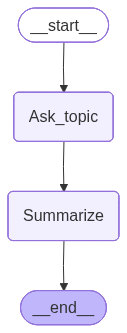

In [82]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))